<a href="https://colab.research.google.com/github/Mezirix/AIDA-Saskpoly/blob/main/copy_of_Assignme_SVM_2023_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing common libraries

In [ ]:
%matplotlib inline

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing other libraries
We'll import the SVM library, and the library that lets us work with artificial and built-in datasets.

In [ ]:
from sklearn import svm
from sklearn import datasets

## Importing more libraries for Question 3, 4 and 5.
We'll use   

*   make_blobs to generate a simple blob
*   dataset, and SVC from svm for classification.



In [ ]:
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_circles
from sklearn.model_selection import train_test_split

### A function to visualize how a classifier works on given data
The function below is basically MatPlotLib magic to make nice visualizations of the SVM classifier for simple 2D data.  It fits the given classifier, and retrieves the support vectors from it afterward.  AS a result, it's specialized to 2D SVM models.

The separating hyperplane is a solid line, and the two margins are visualized as dashed lines.  The support vectors, i.e., the data points that contribute towards the location of the separating hyperplane, are visualized as circled points.  Data that are not circled do not affect the location of the hyperplane.

You can call this function without having to understand everything it's doing.

In [ ]:
def plot_hyperplane(svm_clf, X, y):
    """ Plot the separating hyperplane determined by svm_clf on data X with classes y.
        The classifier svm_clf is assumed not to have been fitted to the data already.
        Data is assumed to be 2D, with exactly 2 class labels.
    """
    # first do the fitting
    svm_clf.fit(X, y)

    # plot the data values X
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

    # plot the decision function
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = svm_clf.decision_function(xy).reshape(XX.shape)

    # plot decision boundary and margins
    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    # plot support vectors
    ax.scatter(svm_clf.support_vectors_[:, 0], svm_clf.support_vectors_[:, 1], s=100,
               linewidth=1, facecolors='none', edgecolors='k')
    plt.show()

### Generate some synthetic data
We can generate some synthetic data using some built in tools provided by scikit in the library ```sklearn.datasets```.  
* ```make_blobs()``` creates separable clusters in 2D.
* ```make_circles()``` creates a blob with a circle around it.
* ```make_moons()``` creates semi-circles that are not linearly separable

For the ```plot_hyperplane()``` function above, we're limited to two classes for the visualization.  To generate new data change the ```random_state``` value.  

These datasets are 2D, so we can visualize them.  

In [ ]:
blob_X, blob_y = datasets.make_blobs(n_samples=40, centers=2, random_state=34)
circ_X, circ_y = datasets.make_circles(n_samples=40, random_state=84)
moon_X, moon_y = datasets.make_moons(n_samples=40, random_state=61)

#### Regularization in  SVM models
In class, we approached regularization by formulating a Loss function that balanced error against the complexity of the model.
$$ Loss(x, m) = Err(x, m) + \lambda Complexity(m) $$
When $\lambda$ gets bigger, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

It turns out that some machine learning models, including SVM, traditionally use a different formulation:
$$ Loss(x, m) = C \times Err(x, m) + Complexity(m) $$
In this formulation, as $C$ gets smaller, the Complexity of the model contributes more to the Loss, and simpler models are emphasized.  

Either way, it's the relative balance between error and complexity that matters.  In the scikit libraries, we can indicate how to balance error and complexity using the keyword parameter ```C=1.0```  

To emphasize Error, make ```C>>>1``` .  

To emphasize complexity, make ```C<<1```.

#### Apply a simple linear SVM to some data

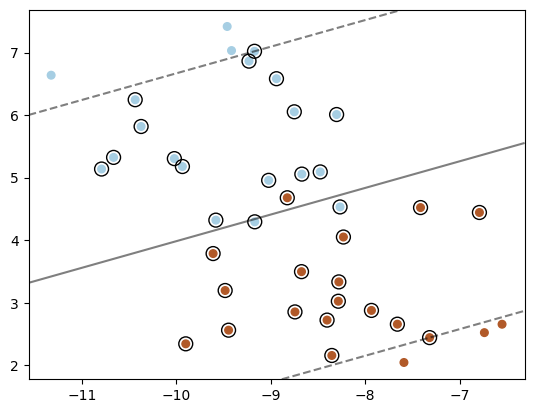

In [ ]:
plot_hyperplane(svm.SVC(kernel='linear', C=0.01), blob_X, blob_y)

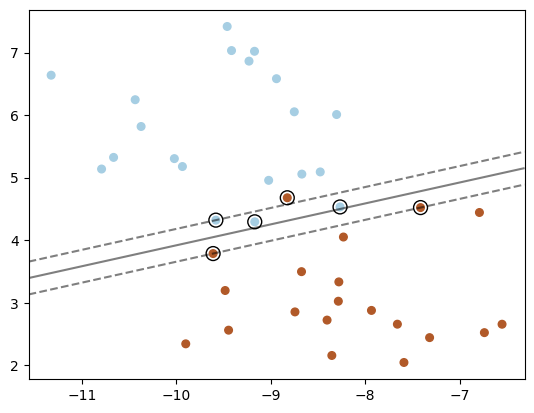

In [ ]:
plot_hyperplane(svm.SVC(kernel='linear', C=100), blob_X, blob_y)

#### Apply SVM with a Polynomial Kernel to some data

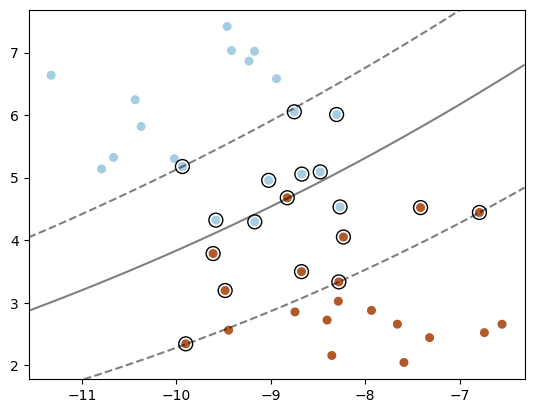

In [ ]:
plot_hyperplane(svm.SVC(kernel='poly', degree=3, C=1), blob_X, blob_y)

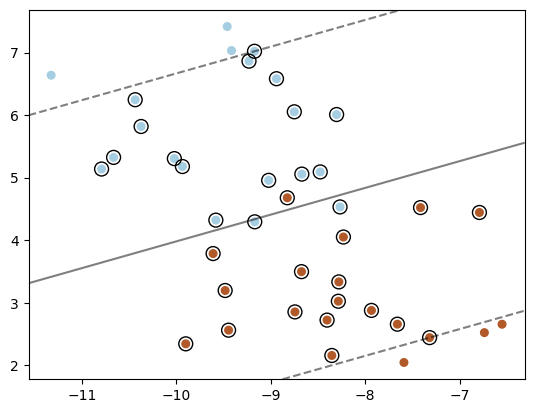

In [ ]:
plot_hyperplane(svm.SVC(kernel='poly', degree=1, C=1), blob_X, blob_y)

#### Apply SVM with a Radial Basis Function Kernel to some data

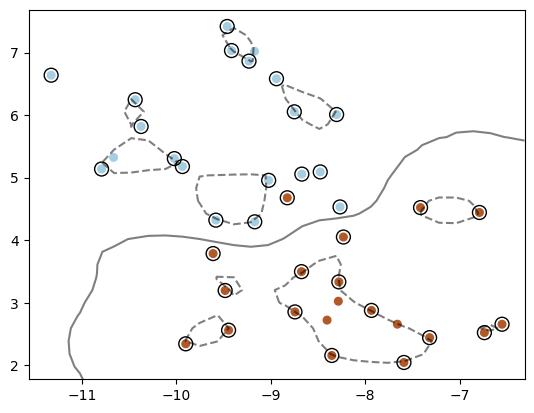

In [ ]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=3, C=1), blob_X, blob_y)

# Question 1 --- Kernels!

Describe the term *kernel* in the context of Support Vector Machines.  Explain the polynomial kernel, and the Radial Basis function kernel.  

# **Answer**
In the context of Support Vector Machines (SVM), a kernel is a function that transforms the data into a higher-dimensional space, allowing SVM to find a separating hyperplane when the data is not linearly separable in its original space. Kernels enable SVMs to solve classification and regression problems by mapping the original data points into a new space where they become linearly separable.

**Polynomial kernel** captures feature interactions up to a certain degree.
**Radical Basis Function kernel** measures similarity based on distance and can handle more complex relationships.

# Question 2 --- Exploring the balance between error and model complexity

Explore what happens to the three models (```linear```, ```poly```, ```rbf```) when you change ```C```.  Use ```C=1000``` and ```C=0.001``` **on the blob dataset.**  Your answer may depend on the dataset you are using (so if you change the ```random_state```, the behaviour may change).   

linear change when using C=1000 and C=0.001

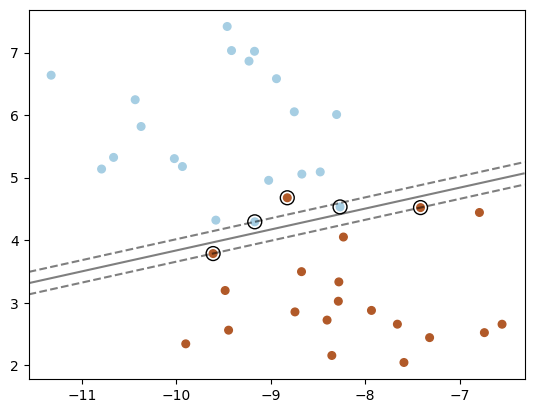

In [ ]:
plot_hyperplane(svm.SVC(kernel='linear', C=1000), blob_X, blob_y)

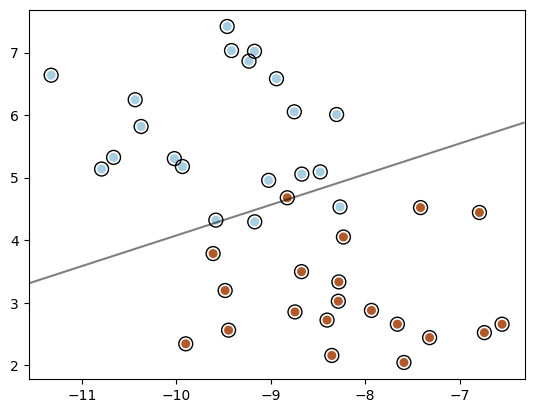

In [ ]:
plot_hyperplane(svm.SVC(kernel='linear', C=0.001), blob_X, blob_y)

Poly change when using C=1000 and C=0.001

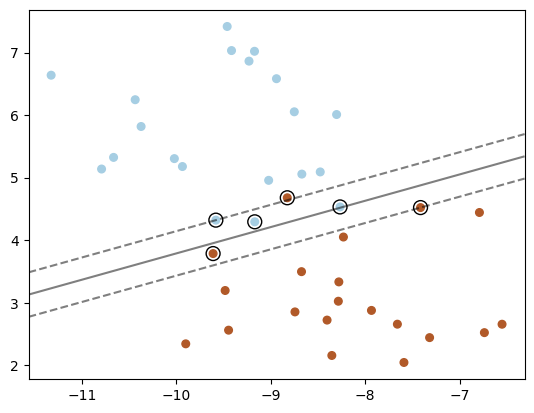

In [ ]:
plot_hyperplane(svm.SVC(kernel='poly', degree=1, C=1000), blob_X, blob_y)

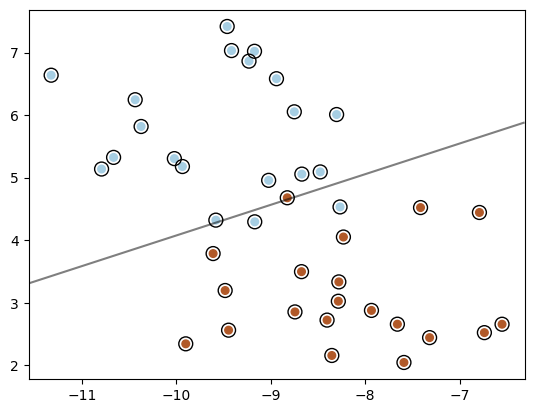

In [ ]:
plot_hyperplane(svm.SVC(kernel='poly', degree=1, C=0.001), blob_X, blob_y)

rbf change when using C=1000 and C=0.001

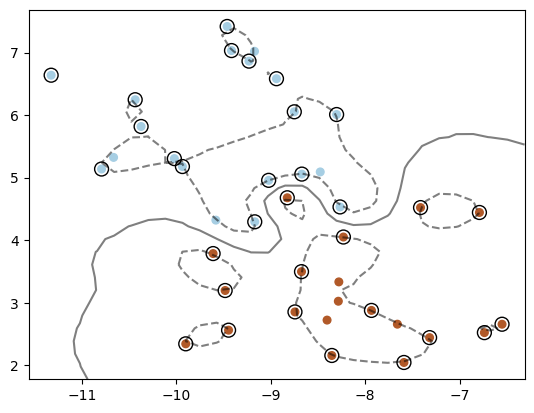

In [ ]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=3, C=1000), blob_X, blob_y)

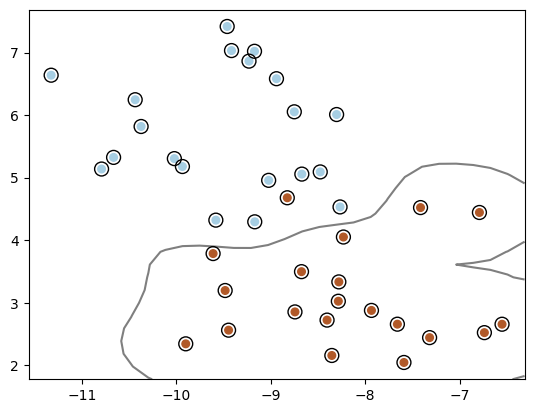

In [ ]:
plot_hyperplane(svm.SVC(kernel='rbf', gamma=3, C=0.001), blob_X, blob_y)

## What happens to the three models

C = 1000 (Low Regularization): Leads to more complex decision boundaries that aim to fit the training data as perfectly as possible, often resulting in overfitting. This is especially evident with the RBF and Polynomial kernels, which can create highly intricate boundaries.


C = 0.001 (High Regularization): Creates smoother, simpler decision boundaries that prioritize generalization. This often leads to underfitting, as the model does not capture enough of the data's complexity. It is especially noticeable in non-linear kernels like RBF and Polynomial, where the boundary becomes overly simplistic.

# Question 3 --- Polynomial Kernel Exploration
Explore the Polynomial kernel, by using the optional keyword parameter ```degree``` which is available in scikit, **on the blob dataset.**  Use a couple of different integers for the degree (in the range 2-5, to limit computation times), and explain what happens. You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q3 Answer

3a). Generate the blob dataset: We create a simple 2D dataset with make_blobs. This function generates isotropic Gaussian blobs for clustering.

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)


3b). Split the dataset into training and test sets: Splitting the data ensures we can evaluate the model on unseen data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


3c). Train an SVM with a Polynomial Kernel for various degrees: I'll explore the effect of different degrees (e.g., 2, 3, 4, 5) on the decision boundary.

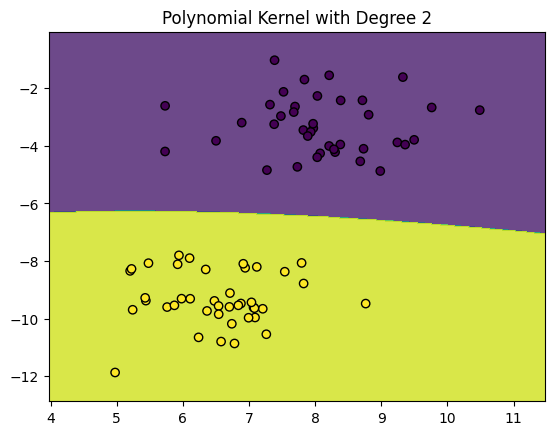

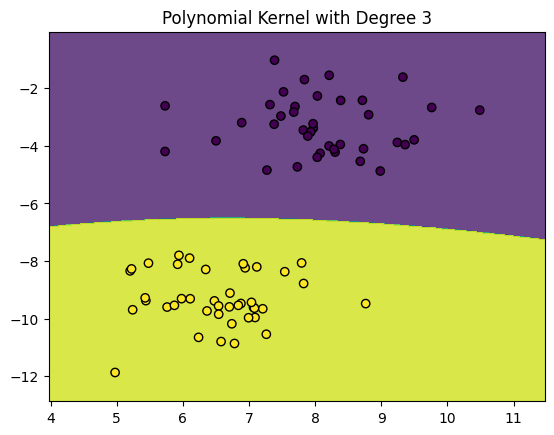

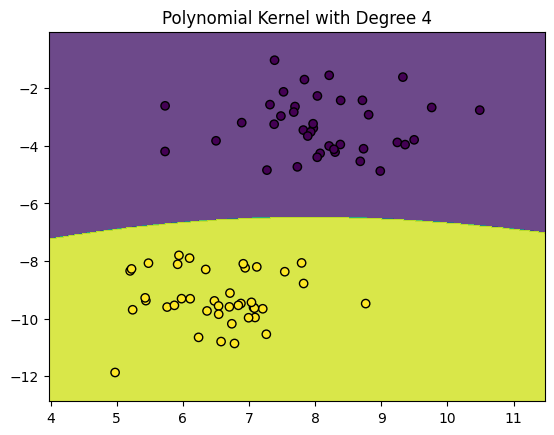

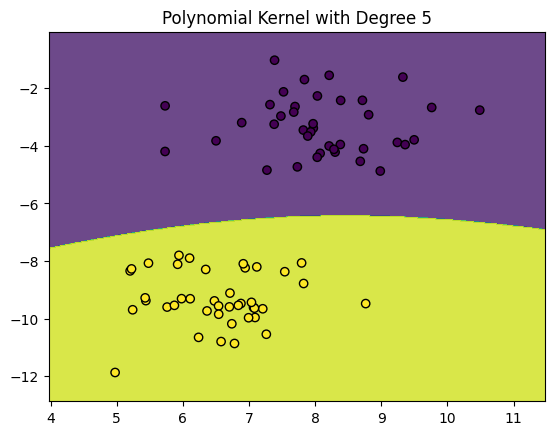

In [ ]:
degrees = [2, 3, 4, 5]
for degree in degrees:
    clf = svm.SVC(kernel='poly', degree=degree)
    clf.fit(X_train, y_train)

    # Plot the decision boundary
    plt.figure()
    plt.title(f"Polynomial Kernel with Degree {degree}")
    plot_decision_boundary(clf, X_train, y_train)


Define a function to plot the decision boundary: This helper function visualizes the decision boundary of the SVM model.

In [ ]:
def plot_decision_boundary(clf, X, y):
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get predictions for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()


## explain what happens.

Lower-degree polynomial kernels (like degree 2) strike a balance between fitting the data and maintaining a smooth, generalizable decision boundary.


Higher-degree polynomial kernels (3, 4, and 5) produce increasingly complex boundaries, which may lead to better performance on training data but also increase the risk of overfitting.


The choice of degree depends on the complexity of the dataset and the trade-off between bias and variance.

# Question 4 --- RBF Kernel Exploration
Explore the Radial Basis Function kernel, by using the optional keyword parameter ```gamma```, **on the blob dataset.**  Try various extreme values for ```gamma```, and explain what happens.  You may explore other ```svm.SVC``` parameters in the context of exploring degree, but this is optional.

## Q4 Answer

Generate the blob dataset: Create a simple 2D dataset with make_blobs

In [ ]:
X, y = make_blobs(n_samples=100, centers=2, random_state=6)


Split the dataset into training and test sets: Splitting the data ensures we can evaluate the model on unseen data.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Train an SVM with RBF Kernel for various gamma values: We will explore how different values of gamma affect the decision boundary. Extreme values include very small (gamma=0.01), medium (gamma=1), and very large values (gamma=100).

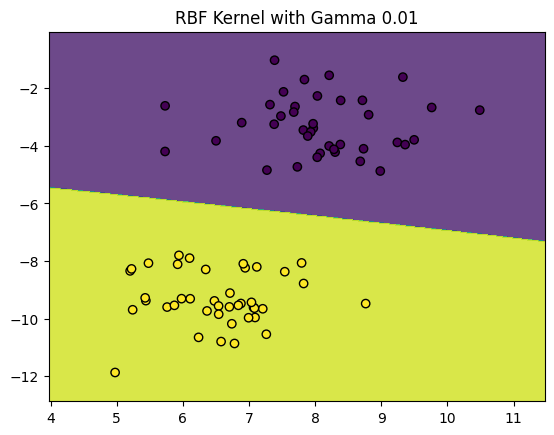

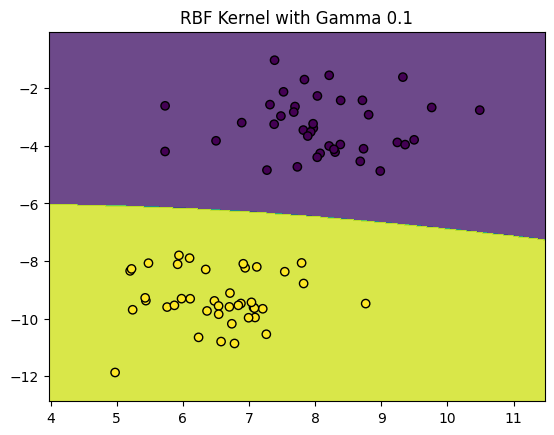

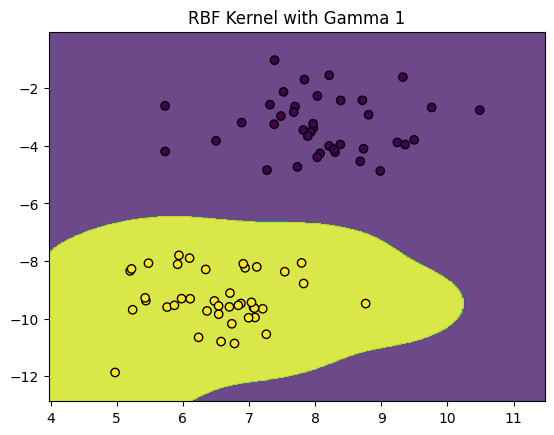

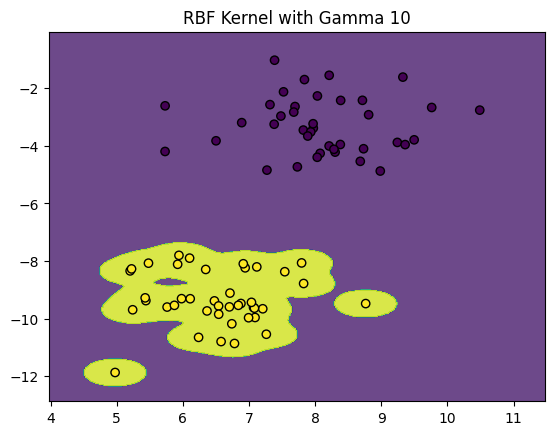

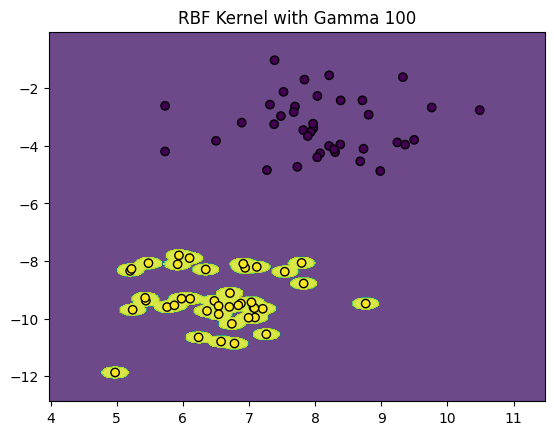

In [ ]:
gammas = [0.01, 0.1, 1, 10, 100]
for gamma in gammas:
    clf = svm.SVC(kernel='rbf', gamma=gamma)
    clf.fit(X_train, y_train)

    # Plot the decision boundary
    plt.figure()
    plt.title(f"RBF Kernel with Gamma {gamma}")
    plot_decision_boundary(clf, X_train, y_train)


Define the function to plot the decision boundary

In [ ]:
def plot_decision_boundary(clf, X, y):
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get predictions for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()


## explain what happens

a). Low Gamma (0.01 - 0.1): Results in smoother decision boundaries that might underfit the data, failing to capture the underlying complexity.
b). Medium Gamma (1): Provides a balanced decision boundary that adapts to the data without overfitting.
c). High Gamma (10 - 100): Produces complex decision boundaries that may lead to overfitting, as the model tries to classify every training point perfectly.

# Question 5 --- Other synthetic datasets

Explore all three different kernels on the two other datasets above.  Choose a parameter setting for each kernel, including a value for ```C```, that seems to be lead to what you consider a good fit.  Explain briefly why you decided on the ```svm.SVC``` parameter settings that you chose.

## Q5 Answer

Put your answer here!  You can add code cells and markdown cells to describe what's going on.  Use various settings and show various visualizations, using ```plot_hyperplane()``` or other Python scripts.  

Generate the two datasets (moons and circles):

In [ ]:
# Generate the moons dataset
X_moons, y_moons = make_moons(n_samples=100, noise=0.1, random_state=42)
# Generate the circles dataset
X_circles, y_circles = make_circles(n_samples=100, factor=0.3, noise=0.1, random_state=42)


Split each dataset into training and test sets:

In [ ]:
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.2, random_state=42)
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.2, random_state=42)


Explore the three kernels on each dataset: We'll train an SVM model using each of the three kernels: Linear, Polynomial, and RBF.



## 1. Moons Dataset
Linear Kernel:


*  Settings: C = 1 (default value)
*  Explanation: Since the moons dataset is non-linear, the linear kernel is not expected to perform very well, but we use it as a baseline to observe how much improvement the non-linear kernels offer.

In [ ]:
clf_linear = svm.SVC(kernel='linear', C=1)
clf_linear.fit(X_train_moons, y_train_moons)


SVC(C=1, kernel='linear')

## Polynomial Kernel:

*   Settings: C = 1, degree = 3
*   Explanation: A polynomial kernel with degree 3 offers more flexibility to capture the non-linearity of the dataset. We choose C = 1 to allow for some flexibility in decision boundary complexity without overfitting.

In [ ]:
clf_poly = svm.SVC(kernel='poly', degree=3, C=1)
clf_poly.fit(X_train_moons, y_train_moons)


SVC(C=1, kernel='poly')

## RBF Kernel:
*   Settings: C = 1, gamma = 1
*   Explanation: The RBF kernel is a natural choice for non-linear datasets like moons. Gamma = 1 is chosen as a medium value to balance the complexity of the decision boundary. We leave C = 1 to avoid overfitting.





In [ ]:
clf_rbf = svm.SVC(kernel='rbf', gamma=1, C=1)
clf_rbf.fit(X_train_moons, y_train_moons)


SVC(C=1, gamma=1)

# Plot the decision boundaries:

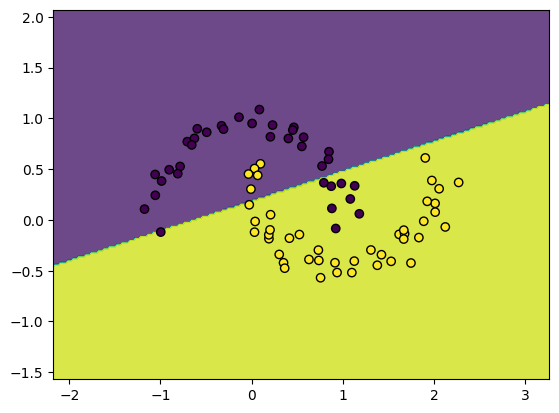

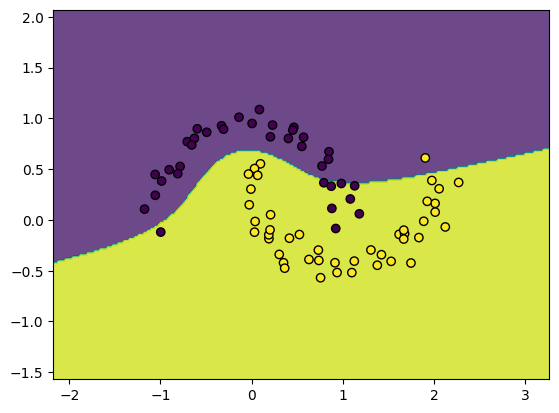

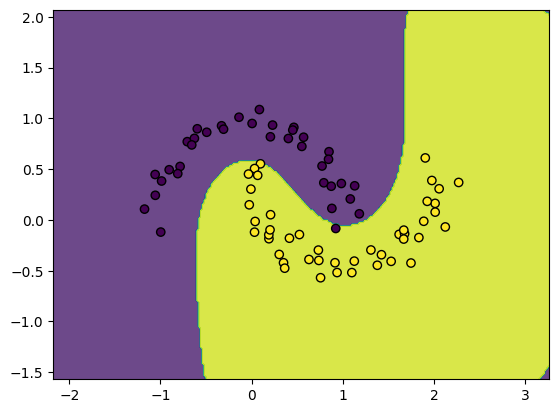

In [ ]:
def plot_decision_boundary(clf, X, y):
    # Create a mesh grid
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Get predictions for each point in the mesh grid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and the training points
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o')
    plt.show()

# Plot for each kernel on the moons dataset
plot_decision_boundary(clf_linear, X_train_moons, y_train_moons)
plot_decision_boundary(clf_poly, X_train_moons, y_train_moons)
plot_decision_boundary(clf_rbf, X_train_moons, y_train_moons)


## 2. Circles Dataset
# Linear Kernel:

*   Settings: C = 1
*   Explanation: Similar to the moons dataset, the circles dataset is also non-linear and cannot be separated by a linear decision boundary. We expect poor performance with the linear kernel here.


In [ ]:
clf_linear_circles = svm.SVC(kernel='linear', C=1)
clf_linear_circles.fit(X_train_circles, y_train_circles)


SVC(C=1, kernel='linear')

# Polynomial Kernel:

* Settings: C = 1, degree = 3
* Explanation: The polynomial kernel can better handle the non-linear separation of the circles dataset. We choose degree = 3 to give enough flexibility for fitting the circular pattern while keeping C = 1 to avoid overfitting.

In [ ]:
clf_poly_circles = svm.SVC(kernel='poly', degree=3, C=1)
clf_poly_circles.fit(X_train_circles, y_train_circles)


SVC(C=1, kernel='poly')

# RBF Kernel:

* Settings: C = 1, gamma = 1
* Explanation: The RBF kernel is ideal for this type of non-linearly separable dataset. Gamma = 1 strikes a good balance between underfitting and overfitting, and C = 1 keeps regularization at a moderate level.

In [ ]:
clf_rbf_circles = svm.SVC(kernel='rbf', gamma=1, C=1)
clf_rbf_circles.fit(X_train_circles, y_train_circles)


SVC(C=1, gamma=1)

## Plot the decision boundaries:

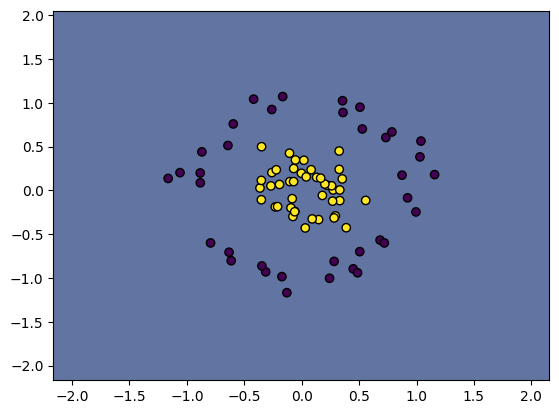

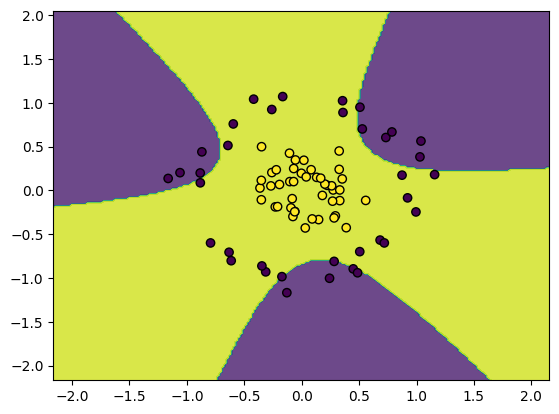

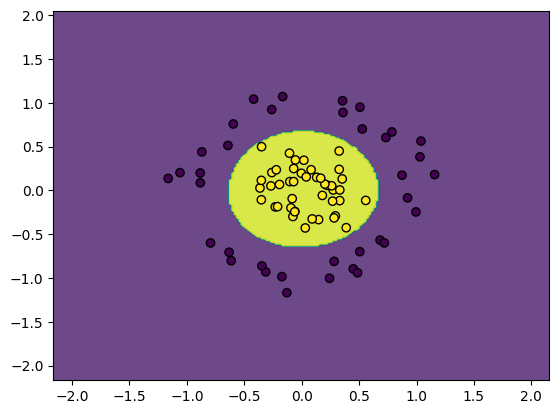

In [ ]:
# Plot for each kernel on the circles dataset
plot_decision_boundary(clf_linear_circles, X_train_circles, y_train_circles)
plot_decision_boundary(clf_poly_circles, X_train_circles, y_train_circles)
plot_decision_boundary(clf_rbf_circles, X_train_circles, y_train_circles)


## Explain briefly why you decided on the svm.SVC parameter settings that you chose:

* Linear Kernel: Chose C = 1 for simplicity. Since both the moons and circles datasets are non-linear, this kernel does not perform well. We mainly use it to compare with non-linear kernels.

* Polynomial Kernel: Chose degree = 3 and C = 1 for both datasets. The polynomial kernel helps handle non-linearities better than the linear kernel, but its performance depends on the complexity of the data. We keep C = 1 to balance between fitting and regularization.

* RBF Kernel: Chose gamma = 1 and C = 1 for both datasets. The RBF kernel is the most flexible and adapts well to non-linearly separable datasets. This combination often provides a good balance between capturing complexity and avoiding overfitting.